In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [402]:
car = pd.read_csv("C:\D\Dinesh\Final Project\Car details v3.csv")

In [403]:
car.head()
        

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [404]:
car.shape

(8128, 13)

In [405]:
car['name'].nunique()

2058

In [406]:
car['name'].value_counts()

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64

In [407]:
car.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [408]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [409]:
car[car['mileage'].isnull()].index

Index([  13,   31,   78,   87,  119,  138,  200,  206,  228,  252,
       ...
       7582, 7595, 7651, 7730, 7740, 7846, 7996, 8009, 8068, 8103],
      dtype='int64', length=221)

In [410]:
car.drop(car[car['mileage'].isnull()].index,axis=0, inplace=True)

In [411]:
car.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           1
seats            0
dtype: int64

In [412]:
car.drop(['torque'],axis =1, inplace = True)

In [413]:
car.shape # Torque removed and NULL value removed

(7907, 12)

In [414]:
car['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: count, dtype: int64

In [415]:
#Mapping values for fuels
# Diesel = 3
#Petrol =2
#Others = 1

map_dict_fuel = {'Diesel':3,'Petrol':2,'CNG':1,'LPG':1}
car['fuel']=car['fuel'].map(map_dict_fuel)

In [416]:
car['fuel'].value_counts()

fuel
3    4299
2    3520
1      88
Name: count, dtype: int64

In [417]:
car['seller_type'].value_counts()

seller_type
Individual          6564
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [418]:
#Mapping values for Seller_Type
# Individual = 1
#Dealer =2
#Trustmark Dealer = 3

map_dict_Seller_type = {'Individual':1,'Dealer':2,'Trustmark Dealer':3}
car['seller_type']=car['seller_type'].map(map_dict_Seller_type)

In [419]:
car['seller_type'].value_counts()

seller_type
1    6564
2    1107
3     236
Name: count, dtype: int64

In [420]:
car['transmission'].value_counts()

transmission
Manual       6866
Automatic    1041
Name: count, dtype: int64

In [421]:
#Mapping values for Transmission
# Manual = 1
#Automatic =2

map_dict_transmission = {'Manual':1,'Automatic':2}
car['transmission']=car['transmission'].map(map_dict_transmission)

In [422]:
car['transmission'].value_counts()

transmission
1    6866
2    1041
Name: count, dtype: int64

In [423]:
map_dict_owner = {'First Owner':4,'Second Owner':3,'Third Owner':2,'Fourth & Above Owner':1}
car['owner']=car['owner'].map(map_dict_owner)

In [424]:
car['owner'].value_counts()

owner
4.0    5215
3.0    2017
2.0     510
1.0     160
Name: count, dtype: int64

In [425]:
# change the string to float for further process


car['mileage'] = car['mileage'].str.split(" ").str[0].astype('float')

In [426]:
car['mileage'].dtype

dtype('float64')

In [427]:
car['engine'] = car['engine'].str.split(" ").str[0].astype('float') # converted to float

In [428]:
car['engine'].dtype

dtype('float64')

In [429]:
# Change the string to float
car['max_power'] = car['max_power'].str.split(" ").str[0]

In [430]:
car['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 7907, dtype: object

In [431]:
car['max_power'].shape

(7907,)

In [432]:
car[~car['max_power'].str.replace('.','').str.isnumeric()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4933,Maruti Omni CNG,2000,80000,100000,1,1,1,3.0,10.9,796.0,,8.0


In [433]:
car.drop(4933,axis=0,inplace= True)

In [434]:
car['max_power'] = car['max_power'].str.split(" ").str[0].astype('float')

In [435]:
car['max_power'].dtype

dtype('float64')

In [436]:
car['seats']=car['seats'].astype('int')

In [437]:
car['seats'].dtype

dtype('int32')

In [438]:
car.drop(['name'],axis =1, inplace = True)

In [439]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int64  
 4   seller_type    7906 non-null   int64  
 5   transmission   7906 non-null   int64  
 6   owner          7901 non-null   float64
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   int32  
dtypes: float64(4), int32(1), int64(6)
memory usage: 710.3 KB


In [440]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,3,1,1,4.0,23.40,1248.0,74.00,5
1,2014,370000,120000,3,1,1,3.0,21.14,1498.0,103.52,5
2,2006,158000,140000,2,1,1,2.0,17.70,1497.0,78.00,5
3,2010,225000,127000,3,1,1,4.0,23.00,1396.0,90.00,5
4,2007,130000,120000,2,1,1,4.0,16.10,1298.0,88.20,5


In [441]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int64  
 4   seller_type    7906 non-null   int64  
 5   transmission   7906 non-null   int64  
 6   owner          7901 non-null   float64
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   int32  
dtypes: float64(4), int32(1), int64(6)
memory usage: 710.3 KB


In [442]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,3,1,1,4.0,23.40,1248.0,74.00,5
1,2014,370000,120000,3,1,1,3.0,21.14,1498.0,103.52,5
2,2006,158000,140000,2,1,1,2.0,17.70,1497.0,78.00,5
3,2010,225000,127000,3,1,1,4.0,23.00,1396.0,90.00,5
4,2007,130000,120000,2,1,1,4.0,16.10,1298.0,88.20,5


In [443]:
car.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner            float64
mileage          float64
engine           float64
max_power        float64
seats              int32
dtype: object

In [444]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,3,1,1,4.0,23.40,1248.0,74.00,5
1,2014,370000,120000,3,1,1,3.0,21.14,1498.0,103.52,5
2,2006,158000,140000,2,1,1,2.0,17.70,1497.0,78.00,5
3,2010,225000,127000,3,1,1,4.0,23.00,1396.0,90.00,5
4,2007,130000,120000,2,1,1,4.0,16.10,1298.0,88.20,5


In [445]:
car.shape

(7906, 11)

In [454]:
car['owner'].isnull().sum()

5

In [455]:
car.drop(car[car['owner'].isnull()].index,axis=0, inplace=True)

In [456]:
car.shape

(7900, 11)

In [457]:
car.shape

(7900, 11)

In [458]:
x = car.drop('selling_price',axis = 1)
y = car['selling_price']

In [459]:
car.shape

(7900, 11)

In [460]:
x.shape, y.shape

((7900, 10), (7900,))

In [461]:
pip install -U scikit-learn scipy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [462]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model, metrics

In [463]:
x_train, x_eval, y_train, y_eval = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [464]:
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((6320, 10), (1580, 10), (6320,), (1580,))

In [465]:
lr= LinearRegression()
lr.fit(x_train, y_train)
train_pred =lr.predict(x_train)
train_error = mean_squared_error(y_train,train_pred)
pred = lr.predict(x_eval)
error = mean_squared_error(y_eval,pred)
print(train_error, error)


214812925772.98962 207132675438.69272


In [468]:
import math
rmse = math.sqrt(error)
print(rmse)

455118.3092764921


In [469]:
r2_score(y_eval,pred)

0.6626303885134353

In [470]:
lr.coef_

array([ 3.12350637e+04, -9.98738362e-01,  3.91042845e+04,  8.38195312e+04,
        4.45523592e+05,  2.29540907e+04,  1.62665041e+04,  8.71466147e+01,
        1.35961540e+04, -3.84271652e+04])

In [471]:
lr.intercept_

-64453214.07918451

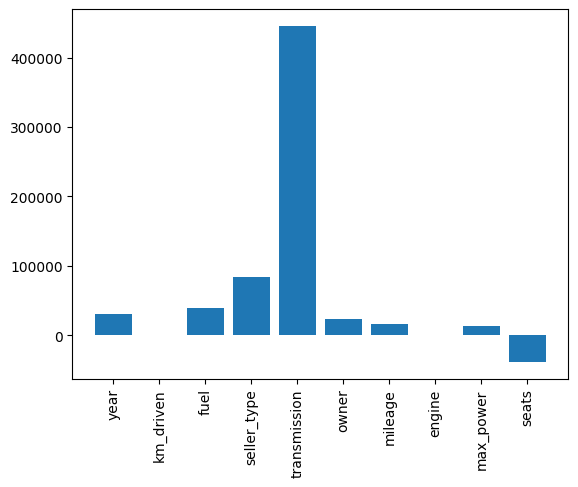

In [478]:
import matplotlib.pyplot as plt
plt.bar(x=x_train.columns, height = lr.coef_)
plt.xticks(rotation = 90)
plt.show()

In [490]:
ls= Lasso(100000)
ls.fit(x_train, y_train)
train_pred =ls.predict(x_train)
train_error = mean_squared_error(y_train,train_pred)
pred = ls.predict(x_eval)
error = mean_squared_error(y_eval,pred)
print(train_error, error)
r2_score(y_eval,pred)

236776063696.5175 234573417315.0071


0.617935979936381

In [491]:
ls.coef_

array([ 3.12112348e+04, -1.55769052e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.72704066e+03, -2.78667976e+01,
        1.69252958e+04, -0.00000000e+00])

In [492]:
x_train.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

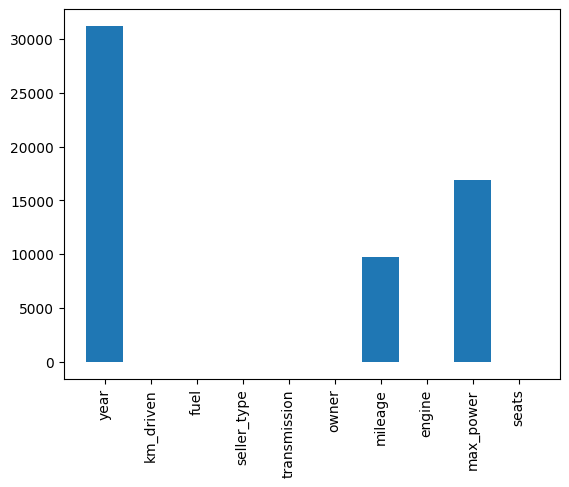

In [494]:
import matplotlib.pyplot as plt
plt.bar(x=x_train.columns, height = ls.coef_)
plt.xticks(rotation = 90)
plt.show()

In [495]:
rg= Ridge(100000)
rg.fit(x_train, y_train)
train_pred =rg.predict(x_train)
train_error = mean_squared_error(y_train,train_pred)
pred = rg.predict(x_eval)
error = mean_squared_error(y_eval,pred)
print(train_error, error)
r2_score(y_eval,pred)

241257546360.29056 237923947526.44684


0.6124787671942902

In [496]:
rg.coef_

array([ 1.68037896e+04, -1.93862118e+00,  2.60588460e+02,  2.28270460e+03,
        2.51123501e+03,  2.22539218e+03,  1.02319717e+04, -2.07505335e+01,
        1.70556028e+04, -1.95130866e+03])

In [497]:
feat_imp = pd.Series(rg.coef_, index = x_train.columns)

In [498]:
feat_imp

year            16803.789579
km_driven          -1.938621
fuel              260.588460
seller_type      2282.704602
transmission     2511.235011
owner            2225.392180
mileage         10231.971682
engine            -20.750533
max_power       17055.602763
seats           -1951.308657
dtype: float64

In [499]:
feat_imp.sort_values(ascending = False)

max_power       17055.602763
year            16803.789579
mileage         10231.971682
transmission     2511.235011
seller_type      2282.704602
owner            2225.392180
fuel              260.588460
km_driven          -1.938621
engine            -20.750533
seats           -1951.308657
dtype: float64

In [500]:
pred

array([ 81750.46280833, -91942.8597236 , 351448.7320859 , ...,
       839724.71778549, 981902.30110655, 731860.4456937 ])

In [510]:
# Predictor
rg.predict(x_eval.loc[[2640],:].values)

C:\Users\Dineshkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([731860.4456937])

In [511]:
x_eval.loc[[2640],:].values

array([[2.019e+03, 5.621e+03, 2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        2.200e+01, 1.197e+03, 8.180e+01, 5.000e+00]])

In [509]:
x_eval


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2699,2017,35000,2,1,1,4.0,24.70,796.0,47.30,5
2167,2005,90000,2,1,1,3.0,17.30,993.0,60.00,5
1274,2012,40000,3,1,1,4.0,23.57,1396.0,70.00,5
5888,2010,166000,3,1,1,2.0,12.05,2179.0,120.00,8
6685,2012,70000,3,1,1,1.0,20.00,1399.0,68.00,5
...,...,...,...,...,...,...,...,...,...,...
2204,2010,120000,3,1,1,3.0,13.00,2489.0,95.00,8
573,2015,101500,3,1,1,3.0,21.14,1498.0,103.52,5
1839,2008,120000,3,1,1,3.0,12.05,2179.0,120.00,8
4806,2013,90000,3,1,1,3.0,12.05,2179.0,120.00,8


In [512]:
x_eval.loc[[2640],:]

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2640,2019,5621,2,3,2,4.0,22.0,1197.0,81.8,5


In [516]:
x_eval.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [513]:
###Manual  Prediction
rg.predict(x_eval.loc[[2640],:].values)

C:\Users\Dineshkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([731860.4456937])